# Module 3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn how to read and interpret p-values for coefficients in R.
2. Apply Partial F-tests to compare different models.
3. Compute confidence intervals for model coefficients.
4. Understand model significance using the Overall F-test.
5. Observe the variability of coefficients using the simulated data.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [9]:
# Load Required Packages
library(ggplot2)

## Problem 1: Individual t-tests

The dataset below measures the chewiness (mJ) of different berries along with their sugar equivalent and salt (NaCl) concentration. Let's use these data to create a model to finally understand chewiness.

Here are the variables: 
1. `nacl`: salt concentration (NaCl)
2. `sugar`: sugar equivalent
3. `chewiness`: chewiness (mJ)

Dataset Source: I. Zouid, R. Siret, F. Jourjion, E. Mehinagic, L. Rolle (2013).
"Impact of Grapes Heterogeneity According to Sugar Level on Both
Physical and Mechanical Berries Properties and their Anthocyanins
Extractability at Harvest," Journal of Texture Studies, Vol. 44, pp. 95-103.

#### 1. (a) Simple linear regression (SLR) parameters

In the below code, we load in the data and fit a SLR model to it, using `chewiness` as the response and `sugar` as the predictor. The summary of the model is printed. Let $\alpha = 0.05$.

Look at the results and answer the following questions:
* What is the hypothesis test related to the p-value `2.95e-09`? Clearly state the null and alternative hypotheses and the decision made based on the p-value.
* Does this mean the coefficient is statistically significant? 
* What does it mean for a coefficient to be statistically significant?

In [16]:
# Load the data
chew.data = read.csv("berry_sugar_chewy.csv")
chew.lmod = lm(chewiness~sugar, data=chew.data)
summary(chew.lmod)


Call:
lm(formula = chewiness ~ sugar, data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4557 -0.5604  0.1045  0.5249  1.9559 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.662878   0.756610  10.128  < 2e-16 ***
sugar       -0.022797   0.003453  -6.603 2.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9178 on 88 degrees of freedom
Multiple R-squared:  0.3313,	Adjusted R-squared:  0.3237 
F-statistic: 43.59 on 1 and 88 DF,  p-value: 2.951e-09


1. _What is the hypothesis test related to the p-value `2.95e-09`? Clearly state the null and alternative hypotheses and the decision made based on the p-value._

    - The hypothesis test asks whether there is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. It accounts for the p-value as it relates to the chosen significance level $\alpha$
    - The null hypothesis is that there is no effect of sugar on chewiness. 
        - $H_0 : \beta_{sugar} = 0$
    - The alternative hypothesis is that there is an effect of sugar on chewiness. 
        - $H_1 : \beta_{sugar} \neq 0$
    - Considering that our p-value of `2.95e-09` is much lower than the significance level of $\alpha = 0.05$, we have sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. 
    
    
2. _Does this mean the coefficient is statistically significant?_ 

    - Yes, due to our low p-value and consequent rejection of the null hypothesis, the coefficient for `sugar` is statistically significant. The `***` on the row also denotes this significance.
    

3. _What does it mean for a coefficient to be statistically significant?_

    - For a coefficient to be statistically significant it means that there is evidence to suggest a linear relationship, or in this case, that sugar has a significant impact on chewiness. 

#### 1. (b) MLR parameters

Now let's see if the second predictor/feature `nacl` is worth adding to the model. In the code below, we create a second linear model fitting `chewiness` as the response with `sugar` and `nacl` as predictors.

Look at the results and answer the following questions:
* Which, if any, of the slope parameters are statistically significant?
* Did the statistical significance of the parameter for `sugar` stay the same, when compared to 1 (a)? If the statistical signficance changed, explain why it changed. If it didn't change, explain why it didn't change.

In [17]:
chew.lmod.2 = lm(chewiness ~ ., data=chew.data)
summary(chew.lmod.2)


Call:
lm(formula = chewiness ~ ., data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3820 -0.6333  0.1234  0.5231  1.9731 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -7.1107    13.6459  -0.521    0.604
nacl          0.6555     0.6045   1.084    0.281
sugar        -0.4223     0.3685  -1.146    0.255

Residual standard error: 0.9169 on 87 degrees of freedom
Multiple R-squared:  0.3402,	Adjusted R-squared:  0.325 
F-statistic: 22.43 on 2 and 87 DF,  p-value: 1.395e-08


1. _Which, if any, of the slope parameters are statistically significant?_

    - The p-values for `nacl` and `sugar` equal `0.281` and `0.255` respectively, so they are both greater than our significance level of $\alpha = 0.05$. This indicates that neither parameter is statistically significant in this model.
    

2. _Did the statistical significance of the parameter for `sugar` stay the same, when compared to 1 (a)? If the statistical signficance changed, explain why it changed. If it didn't change, explain why it didn't change._

    - The statistical significance for `sugar` did not stay the same. In fact, its p-value changed from 2.95e-09 in the SLR to 0.255 in the MLR. This corresponds to a reduction in statistical significance. We can attribute this to the introduction multicollinearity to the data due to the predictor `nacl` itself appearing to be correlated with `sugar`. 

#### 1. (c) Model Selection

Determine which of the two models we should use. Explain how you arrived at your conclusion and write out the actual equation for your selected model.

In [23]:
anova(chew.lmod,chew.lmod.2)
summary(chew.lmod)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,88,74.12640,NA,NA,NA,NA
2,87,73.13801,1,0.9883882,1.175719,0.2812249



Call:
lm(formula = chewiness ~ sugar, data = chew.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4557 -0.5604  0.1045  0.5249  1.9559 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.662878   0.756610  10.128  < 2e-16 ***
sugar       -0.022797   0.003453  -6.603 2.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9178 on 88 degrees of freedom
Multiple R-squared:  0.3313,	Adjusted R-squared:  0.3237 
F-statistic: 43.59 on 1 and 88 DF,  p-value: 2.951e-09


* The results of calling anova(chew.lmod, chew.lmod.2) allow us to confidently state that we should use chew.lmod as our model, as the introduction of the 2nd variable leads to less statistically significant results. I came to this conclusion through a few observations:

    - First, as denoted by Pr(>F), the p-value is 0.2812249. This is much higher than our significance level of $\alpha = 0.05$, and as a result, we cannot reject the Null Hypothesis. In this case the null hypothesis states that there is no significant difference between the two models.
    - If there is no significant difference in the models, we should opt for the less complex model. The `Df` value tells us that there is one more predictor in chew.lmod.2 than chew.lmod, and as such, it is the more complex and less desirable model in this situation.
    - The equation for model 1 could be written as:
        - $\text{chewiness} = \beta_0 + \beta_{\text{sugar}} \times \text{sugar} + \epsilon$
    - where:
        - `chewiness` is the response and represents the measurement of chewiness
        - `sugar` is the predictor and represents the sugar equivalent
        - $\beta_0$ is the intercept and respresents `chewiness` when `sugar` is zero
        - $\beta_{\text{sugar}}$ indicates the change in chewiness per unit change in sugar
    - substituting the values from our summary of the model we get:
        - $\text{chewiness} = 7.662878 - 0.022797 \times \text{sugar} + \epsilon$

#### 1. (d) Parameter Confidence Intervals

Compute $95\%$ confidence intervals for each parameter in your selected model. Then, in words, state what these confidence intervals mean.

In [26]:
# Your Code Here
conf_ints = confint(chew.lmod)
conf_ints

,2.5 %,97.5 %
(Intercept),6.15927388,9.16648152
sugar,-0.02965862,-0.01593536


These confidence intervals allow us to estimate a range of possible values for the regression parameters. For example, the output above suggests that the intercept, or the chewiness measurement when sugar is zero, ranges from 6.15927388 to 9.16648152. The sugar coefficient, meanwhile, ranges  from -0.02965862 to -0.01593536. This means that we can say with 95% confidence that the true value for the intercept and and coefficient lies within those respective ranges. 

# Problem 2: Variability of Slope in SLR

In this exercise we'll look at the variability of slopes of simple linear regression models fitted to realizations of simulated data. 

Write a function, called `sim_data()`, that returns a simulated sample of size $n = 20$ from the model $Y = 1 + 2.5X + \epsilon$ where $\epsilon \overset{iid}{\sim} N(0, 1)$. We will then use this generative funciton to understand how fitted slopes can vary, even for the same underlying population.

In [27]:
sim_data <- function(n=20, var=1, beta.0=1, beta.1=2.5){
    # BEGIN SOLUTION HERE
    x = seq(-1, 1, length.out = n); beta0 = 1; beta1 = 2.5; e = rnorm(n, 0, sqrt(var))
    y = beta0 + beta1*x + e
    # END SOLUTION HERE
    data = data.frame(x=x, y=y)
    return(data)
}

#### 2. (a) Fit a slope

Execute the following code to generate 20 data points, fit a simple linear regression model and plot the results.

Just based on this plot, how well does our linear model fit the data?

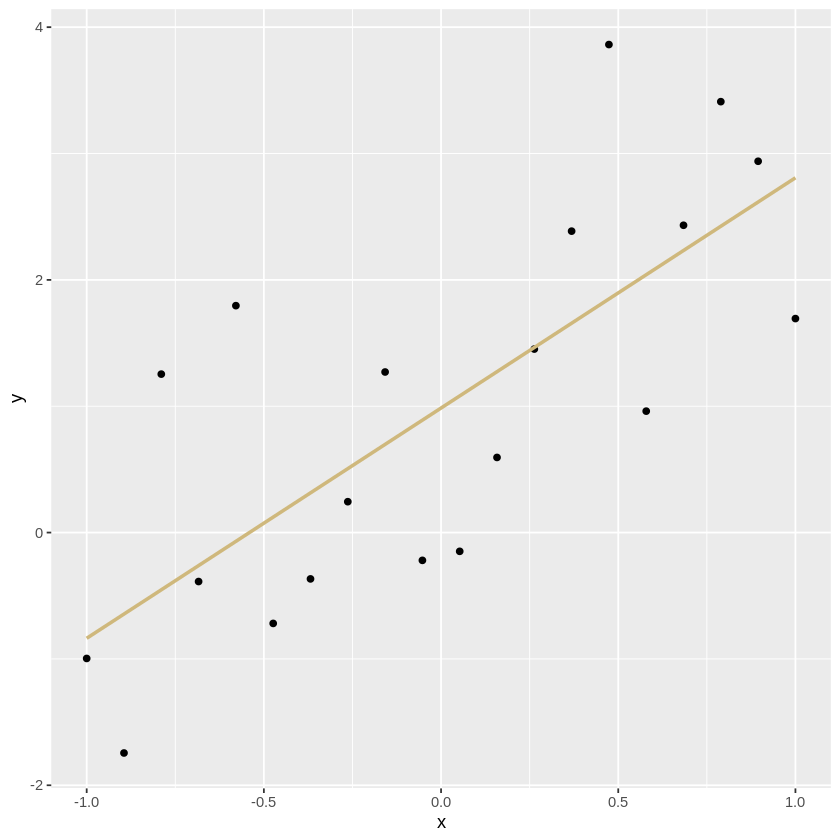

In [28]:
data = sim_data()
lmod = lm(y~x, data=data)
ggplot(aes(x=x, y=y), data=data) + 
    geom_point() +
    geom_smooth(method="lm", formula=y~x, se=FALSE, color="#CFB87C")

At-a-glance, our linear model appear to fit the data reasonably well, though there is definitely a good bit of variance around the line. 

#### 2. (b) Do the slopes change?

Now we want to see how the slope of our line varies with different random samples of data. Call our data genaration function $50$ times to gather $50$ independent samples. Then we can fit a SLR model to each of those samples and plot the resulting slope. The function below performs this for us.

Experiment with different variances and report on what effect that has to the spread of the slopes.

In [37]:
gen_slopes <- function(num.slopes=50, var=1.3, num.samples=20){
    g = ggplot()
    # Repeat the sample for the number of slopes
    for(ii in 1:num.slopes){
        # Generate a random sampling of data
        data = sim_data(n=num.samples, var=var)
        # Add the slope of the best fit linear model to the plot
        g = g + stat_smooth(aes(x=x, y=y), data=data, method="lm", geom="line", 
                            se=FALSE, alpha=0.4, color="#CFB87C", size=1)
    }
    return(g)
}

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using for

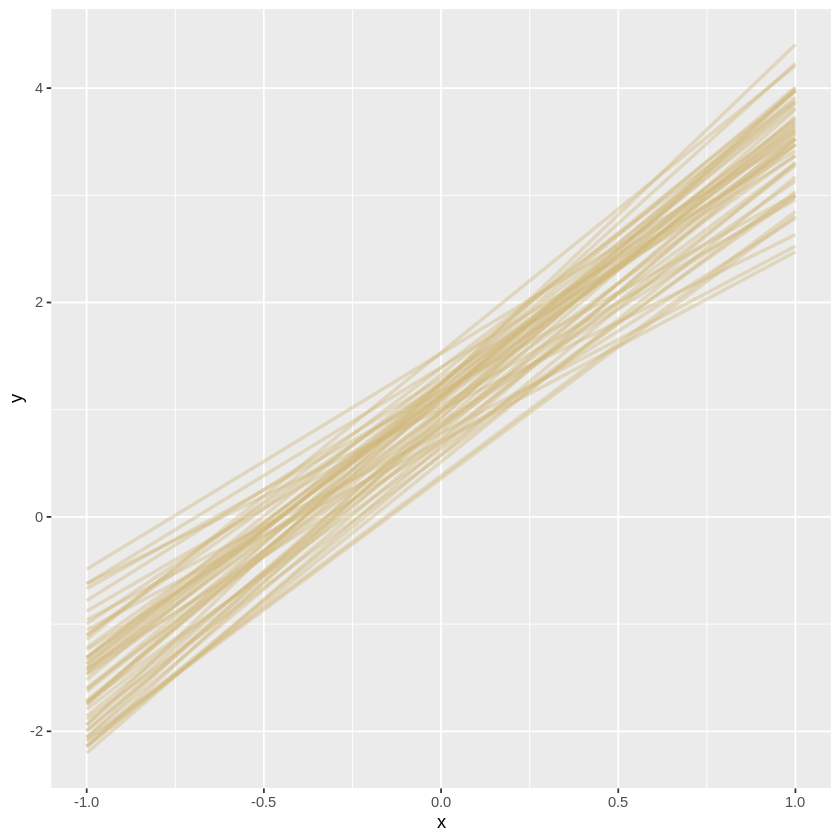

In [38]:
 gen_slopes()

As the variance number increases the distribution of the slopes also increases. An increase by a factor of ten led to a very loose distribution of slopes some of which even differed in direction.

#### 2. (c) Distributions of Slopes

As we see above, the slopes are somewhat random. That means that they follow some sort of distribution, which we can try to discern. The code below computes `num_samples` independent realizations of the model data, computes the SLR model, and generates a histogram of the resulting slopes.

Again, experiment with different variances for the simulated data and record what you notice. What do you notice about the shapes of the resulting histograms?

In [54]:
hist_slopes <- function(num.slopes=500, var=10, num.samples=20){
    slopes = rep(0, num.slopes)
    # For num.slopes, compute a SLR model slope
    for(i in 1:num.slopes){
        # Simulate the desired data
        data = sim_data(var=var, n=num.samples)
        # Fit an SLR model to the data
        lmod = lm(y~x, data=data)
        # Add the slopes to the vector of slopes
        slopes[i] = lmod$coef[2]
    }
    # Plot a histogram of the resulting slopes
    g = ggplot() + aes(slopes) + geom_histogram(color="black", fill="#CFB87C")
    return(g)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



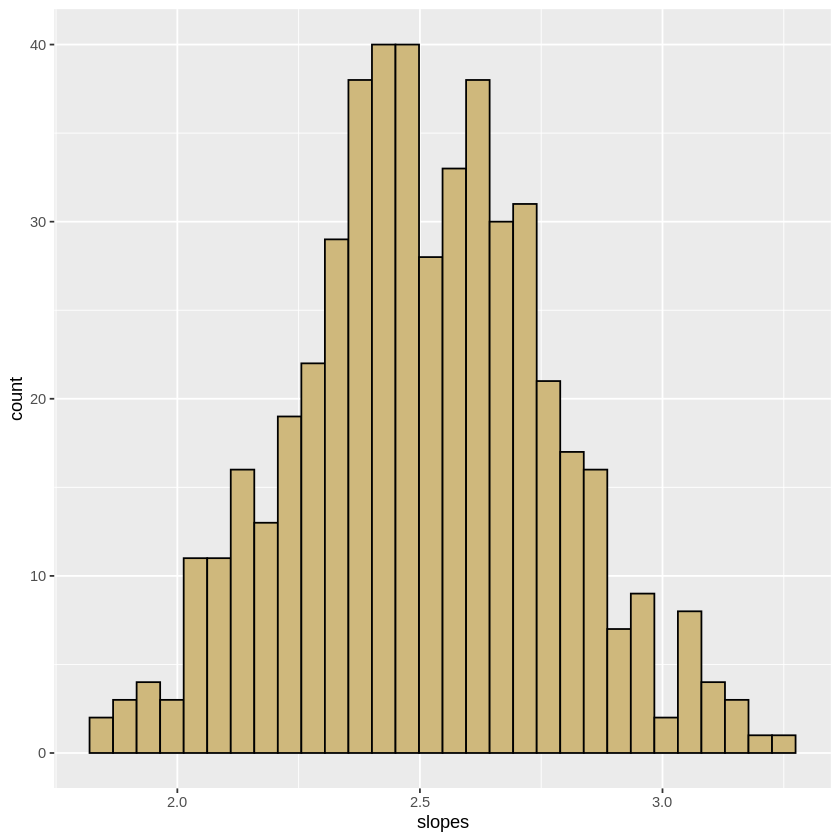

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



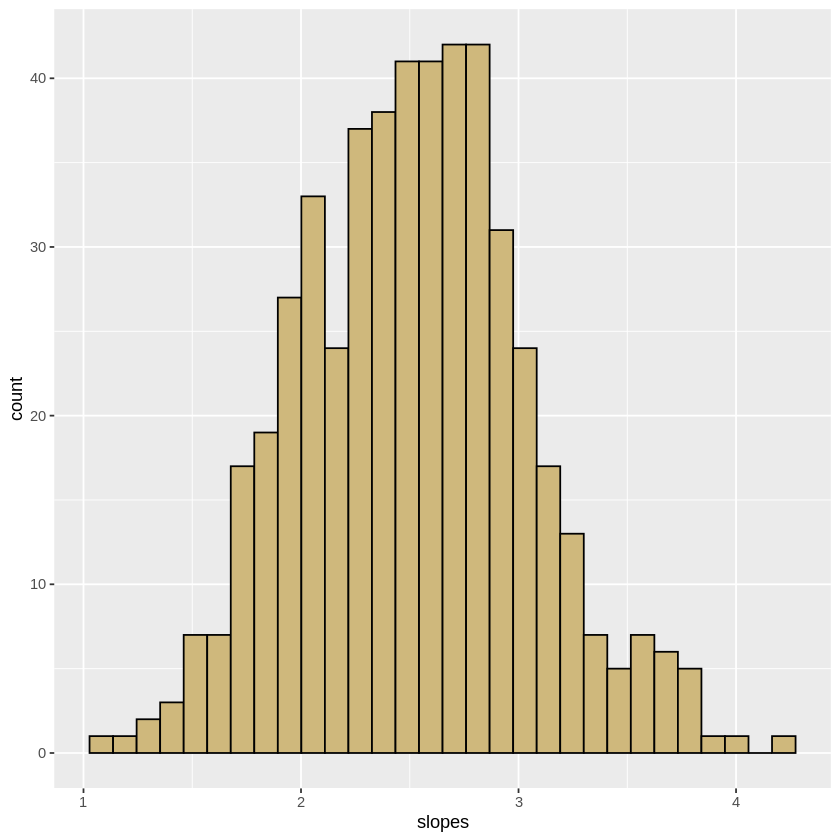

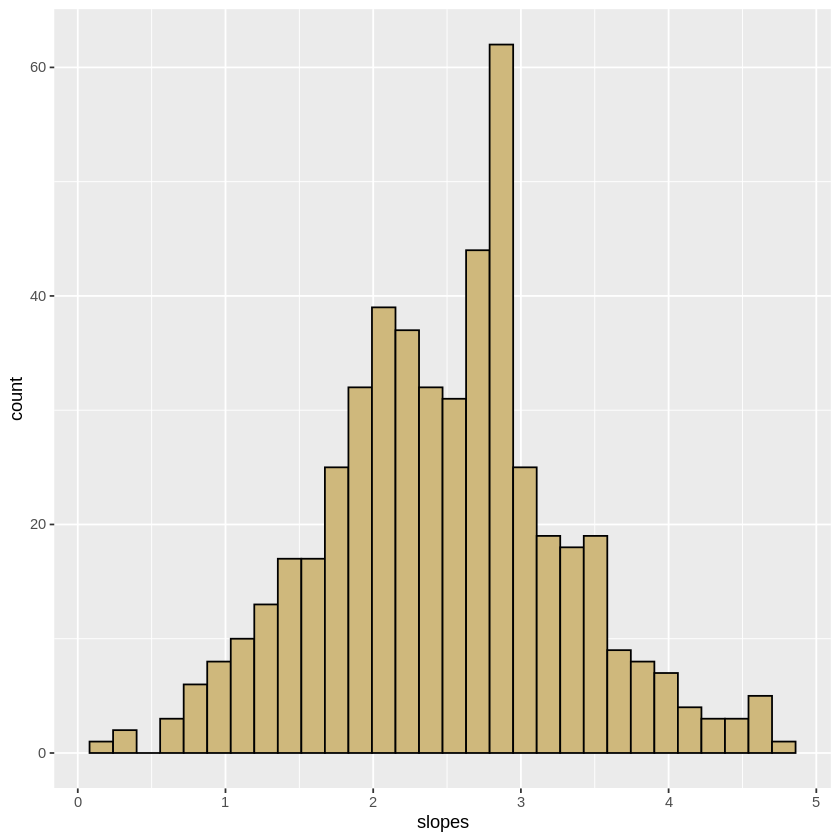

In [57]:
hist_slopes(var = 0.5)
hist_slopes(var = 2)
hist_slopes(var = 5)

As variance increases the histograms tend to display broader shapes and wider distributions while lower variance has slopes more concentrated around a specific value.

#### 2. (d) Confidence Intervals of Slopes

What does that all mean? It means that when we fit a linear regression model, our parameter *estimates* will not be equal to the true parameters. Instead, the estimates will vary from sample to sample, and form a distribution. This is true for any linear regression model with any data - not just simulated data - as long as we assume that there is a large population that we can resample the response from (at fixed predictor values). Also note that we only demonstrated this fact with the slope estimate, but the same principle is true for the intercept, or if we had several slope parameters.

This simulation shows that there is a chance for a linear regression model to have a slope that is very different from the true slope. But with a large sample size, $n$, or small error variance, $\sigma^2$, the distribution will become narrower. Confidence intervals can help us understand this variability. The procedure that generates confidence intervals for our model parameters has a high probability of covering the true parameter. And, the higher $n$ is, for a fixed $\sigma^2$, or the smaller $\sigma^2$ is, for a fixed $n$, the narrower the confidence interval will be!

Draw a single sample of size $n=20$ from `sim_data()` with variance $\sigma^2 = 1$.  Use your sample to compute a 95% confidence interval for the slope. Does the known slope for the model (which we can recall is $2.5$) fall inside your confidence interval?  How does the value of $\sigma^2$ affect the CI width?

In [67]:
# Your code here
single_sample = sim_data(n = 20, var = 1)
lm_single_sample = lm(y ~ x, data = single_sample)

summary(lm_single_sample)

conf_int = confint(lm_single_sample)
conf_int



Call:
lm(formula = y ~ x, data = single_sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10018 -0.72979 -0.05032  1.00836  1.71220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9089     0.2434   3.734  0.00152 ** 
x             2.9030     0.4010   7.240 9.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.088 on 18 degrees of freedom
Multiple R-squared:  0.7444,	Adjusted R-squared:  0.7302 
F-statistic: 52.41 on 1 and 18 DF,  p-value: 9.856e-07


,2.5 %,97.5 %
(Intercept),0.3975216,1.420205
x,2.0606053,3.745485


The known slope (2.5) does indeed fall inside my confidence interval (2.001363-3.558726), and it appears that in general smaller values of $\sigma^2$ correspond to more narrow confidence intervals while larger values indicate wider intervals and greater uncertainty in estimating the slope.